In [21]:
import matplotlib as mpl
import pkgutil as pu
import pydoc

In [22]:
print "matplotlib version",mpl.__version__

matplotlib version 1.5.1


In [23]:
def clean(astr):
   s = astr
   # remove multiple spaces
   s = ' '.join(s.split())
   s = s.replace('=','')

   return s

def print_desc(prefix, pkg_path):
   for pkg in pu.iter_modules(path=pkg_path):
      name = prefix + "." + pkg[1]

      if pkg[2] == True:
         try:
            docstr = pydoc.plain(pydoc.render_doc(name))
            docstr = clean(docstr)
            start = docstr.find("DESCRIPTION")
            docstr = docstr[start: start + 140]
            print name, docstr
         except:
            continue

In [24]:
print_desc("matplotlib", mpl.__path__)

matplotlib.axes 
matplotlib.backends 
matplotlib.compat 
matplotlib.delaunay DESCRIPTION :Author: Robert Kern <robert.kern@gmail.com> :Copyright: Copyright 2005 Robert Kern. :License: BSD-style license. See LICENSE.tx
matplotlib.externals 
matplotlib.projections 
matplotlib.sphinxext 
matplotlib.style 
matplotlib.testing 
matplotlib.tests 
matplotlib.tri 


In [25]:
%matplotlib inline

In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
x = np.linspace(0,20) #指定橫坐標 並且規定起點跟終點分別為0 / 20
print x

[  0.           0.40816327   0.81632653   1.2244898    1.63265306
   2.04081633   2.44897959   2.85714286   3.26530612   3.67346939
   4.08163265   4.48979592   4.89795918   5.30612245   5.71428571
   6.12244898   6.53061224   6.93877551   7.34693878   7.75510204
   8.16326531   8.57142857   8.97959184   9.3877551    9.79591837
  10.20408163  10.6122449   11.02040816  11.42857143  11.83673469
  12.24489796  12.65306122  13.06122449  13.46938776  13.87755102
  14.28571429  14.69387755  15.10204082  15.51020408  15.91836735
  16.32653061  16.73469388  17.14285714  17.55102041  17.95918367
  18.36734694  18.7755102   19.18367347  19.59183673  20.        ]


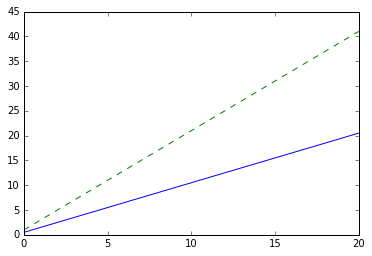

In [28]:
plt.plot(x,.5+x) #兩個參數分別是x y
plt.plot(x,1+2*x,'--')
plt.show() #可以用savefig() 保存到文件中

In [29]:
#對數圖  使用對數座標繪製的圖形 
#對數圖分兩種 一種是雙對數圖 一種是半對數圖
#雙對數圖 使用pyplot.loglog()
#半對數圖 使用semilogx() semilogy()

In [30]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [31]:
df = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/transcount.csv")

In [32]:
print df[:10]
print "df Length",len(df)

   trans_count  year
0   2600000000  2011
1   4310000000  2014
2   1000000000  2010
3   5000000000  2012
4   1200000000  2012
5   3100000000  2012
6   1200000000  2010
7   2100000000  2012
8   2300000000  2010
9    463000000  2007
df Length 81


In [33]:
df = df.groupby('year').aggregate(np.mean) #計算每一年份group後的平均值

In [34]:
print df[:10]

        trans_count
year               
1971    2300.000000
1972    3500.000000
1974    4533.333333
1975    3510.000000
1976    7500.000000
1978   19000.000000
1979   48500.000000
1982   94500.000000
1983    8500.000000
1984  200000.000000


In [35]:
years = df.index.values

In [36]:
print years

[1971 1972 1974 1975 1976 1978 1979 1982 1983 1984 1985 1986 1988 1989 1991
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014]


In [37]:
counts = df['trans_count'].values

In [38]:
print counts

[  2.30000000e+03   3.50000000e+03   4.53333333e+03   3.51000000e+03
   7.50000000e+03   1.90000000e+04   4.85000000e+04   9.45000000e+04
   8.50000000e+03   2.00000000e+05   1.05333333e+05   2.50000000e+04
   2.50000000e+05   7.40117500e+05   6.90000000e+05   3.10000000e+06
   5.78977000e+05   5.50000000e+06   4.30000000e+06   8.15000000e+06
   7.50000000e+06   1.76000000e+07   3.15000000e+07   4.50000000e+07
   1.37500000e+08   1.90066667e+08   3.52000000e+08   1.69000000e+08
   6.04000000e+08   3.71600000e+08   9.03200000e+08   3.45000000e+09
   1.51166667e+09   1.73350000e+09   2.01482643e+09   5.00000000e+09
   4.31000000e+09]


In [39]:
poly = np.polyfit(years,np.log(counts),deg=1) #取得線性多項式
print "Poly",poly  #取得多項式的係數

Poly [  3.61559210e-01  -7.05783195e+02]


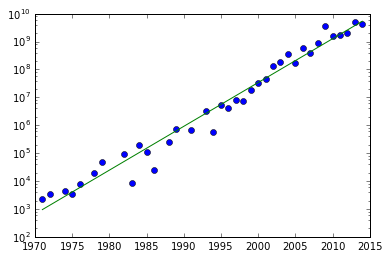

In [40]:
plt.semilogy(years,counts,'o')
plt.semilogy(years,np.exp(np.polyval(poly,years)))  #可以透過polyval 取得
plt.show()

In [48]:
plt.scatter?

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
df = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/transcount.csv")
df = df.groupby('year').aggregate(np.mean)

In [51]:
gpu = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/gpu_transcount.csv")
print gpu[:10]

   gpu_trans_count  year
0          3500000  1997
1          8000000  1999
2         15000000  1999
3         17500000  1999
4         20000000  2000
5         25000000  2000
6         30000000  2000
7         57000000  2001
8         60000000  2001
9         63000000  2002


In [52]:
gpu = gpu.groupby('year').aggregate(np.mean)

In [53]:
print gpu[:10]

      gpu_trans_count
year                 
1997          3500000
1999         13500000
2000         25000000
2001         58500000
2002         85000000
2003        126000000
2004        191000000
2005        312000000
2006        532500000
2007        727000000


In [54]:
df = pd.merge(df,gpu,how='outer',left_index=True,right_index=True) #透過merge merge  兩個data
print df[:10]

        trans_count  gpu_trans_count
year                                
1971    2300.000000              NaN
1972    3500.000000              NaN
1974    4533.333333              NaN
1975    3510.000000              NaN
1976    7500.000000              NaN
1978   19000.000000              NaN
1979   48500.000000              NaN
1982   94500.000000              NaN
1983    8500.000000              NaN
1984  200000.000000              NaN


In [55]:
df = df .replace(np.nan,0)

In [57]:
print df [:10]

        trans_count  gpu_trans_count
year                                
1971    2300.000000              0.0
1972    3500.000000              0.0
1974    4533.333333              0.0
1975    3510.000000              0.0
1976    7500.000000              0.0
1978   19000.000000              0.0
1979   48500.000000              0.0
1982   94500.000000              0.0
1983    8500.000000              0.0
1984  200000.000000              0.0


In [58]:
years = df.index.values

In [59]:
counts = df['trans_count'].values
print counts

[  2.30000000e+03   3.50000000e+03   4.53333333e+03   3.51000000e+03
   7.50000000e+03   1.90000000e+04   4.85000000e+04   9.45000000e+04
   8.50000000e+03   2.00000000e+05   1.05333333e+05   2.50000000e+04
   2.50000000e+05   7.40117500e+05   6.90000000e+05   3.10000000e+06
   5.78977000e+05   5.50000000e+06   4.30000000e+06   8.15000000e+06
   7.50000000e+06   1.76000000e+07   3.15000000e+07   4.50000000e+07
   1.37500000e+08   1.90066667e+08   3.52000000e+08   1.69000000e+08
   6.04000000e+08   3.71600000e+08   9.03200000e+08   3.45000000e+09
   1.51166667e+09   1.73350000e+09   2.01482643e+09   5.00000000e+09
   4.31000000e+09]


In [62]:
gpu_counts = df['gpu_trans_count'].values
print gpu_counts

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   3.50000000e+06
   0.00000000e+00   1.35000000e+07   2.50000000e+07   5.85000000e+07
   8.50000000e+07   1.26000000e+08   1.91000000e+08   3.12000000e+08
   5.32500000e+08   7.27000000e+08   1.17950000e+09   2.15400000e+09
   2.94666667e+09   4.31271187e+09   5.31000000e+09   6.30000000e+09
   0.00000000e+00]


In [63]:
cnt_log = np.log(counts)
print cnt_log

[  7.7406644    8.16051825   8.41921278   8.16337132   8.9226583
   9.85219426  10.78931908  11.45635511   9.04782144  12.20607265
  11.5648852   10.1266311   12.4292162   13.51456424  13.44444688
  14.94691267  13.26901803  15.52025865  15.27412558  15.91352849
  15.83041358  16.68340946  17.2654981   17.62217305  18.73913448
  19.06288545  19.67914173  18.94540927  20.21908476  19.73332856
  20.62145457  21.96164007  21.13647863  21.27340832  21.42379889
  22.33270375  22.18420374]


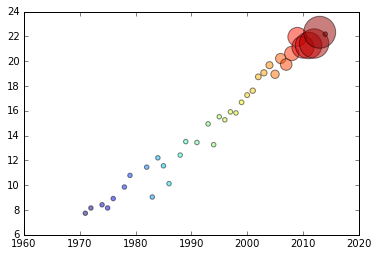

In [64]:
plt.scatter(years,cnt_log,c=200*years,s=20+1000*gpu_counts/gpu_counts.max(),alpha=0.5)
#c為 color s 為圓圈大小 alpha為透明度
plt.show()

In [65]:
#圖例可以使用matplotlib legend()給每個數據序列對應的標籤
#註解可以使用matplotlib annotate()包括標籤和箭頭兩個組成部分
#橫軸跟縱軸的標籤可以透過xlabel() ylabel()
#標題使用matplotlib title()
#網格matplotlib  grid()

In [66]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [67]:
df = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/transcount.csv")
df = df.groupby('year').aggregate(np.mean)
gpu = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/gpu_transcount.csv")
gpu = gpu.groupby('year').aggregate(np.mean)
df = pd.merge(df,gpu,how='outer',left_index=True,right_index=True)
df = df .replace(np.nan,0)
years = df.index.values
counts = df['trans_count'].values
gpu_counts = df['gpu_trans_count'].values  

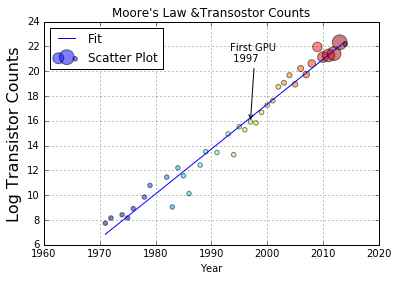

In [69]:
poly = np.polyfit(years,np.log(counts),deg=1)
plt.plot(years,np.polyval(poly,years),label='Fit') #label 可以透過plt.legend()顯示

gpu_start = gpu.index.values.min() #取得有gpu最小的年代
y_ann = np.log(df.at[gpu_start,'trans_count']) #取得有gpu最小的年代的trans_count
ann_str = "First GPU \n %d "%gpu_start  #註解字串
plt.annotate(ann_str,xy=(gpu_start,y_ann),arrowprops=dict(arrowstyle="->"),
             xytext=(-20,+60),textcoords='offset points')
#註解字串的指標位子
#print gpu_start,y_ann
cnt_log = np.log(counts)
plt.scatter(years,cnt_log,c=200*years,s=20 + 200 * gpu_counts/gpu_counts.max(),
            alpha=0.5,label="Scatter Plot")
plt.legend(loc='upper left')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Log Transistor Counts",fontsize = 16)
plt.title("Moore's Law &Transostor Counts")
plt.show()

In [70]:
#axe3d 可以用來繪製三維圖

In [71]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [72]:
df = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/transcount.csv")
df = df.groupby('year').aggregate(np.mean)
gpu = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/gpu_transcount.csv")
gpu = gpu.groupby('year').aggregate(np.mean)
df = pd.merge(df,gpu,how='outer',left_index=True,right_index=True)
df = df.replace(np.nan,0)

In [73]:
X = df.index.values #給X Y 值
print X

[1971 1972 1974 1975 1976 1978 1979 1982 1983 1984 1985 1986 1988 1989 1991
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014]


In [74]:
Y = np.log(df['trans_count'].values)
print Y

[  7.7406644    8.16051825   8.41921278   8.16337132   8.9226583
   9.85219426  10.78931908  11.45635511   9.04782144  12.20607265
  11.5648852   10.1266311   12.4292162   13.51456424  13.44444688
  14.94691267  13.26901803  15.52025865  15.27412558  15.91352849
  15.83041358  16.68340946  17.2654981   17.62217305  18.73913448
  19.06288545  19.67914173  18.94540927  20.21908476  19.73332856
  20.62145457  21.96164007  21.13647863  21.27340832  21.42379889
  22.33270375  22.18420374]


In [75]:
X,Y = np.meshgrid(X,Y) #因為要建立數據矩陣 所以要使用meshgrid整理list
print X
print Y

[[1971 1972 1974 ..., 2012 2013 2014]
 [1971 1972 1974 ..., 2012 2013 2014]
 [1971 1972 1974 ..., 2012 2013 2014]
 ..., 
 [1971 1972 1974 ..., 2012 2013 2014]
 [1971 1972 1974 ..., 2012 2013 2014]
 [1971 1972 1974 ..., 2012 2013 2014]]
[[  7.7406644    7.7406644    7.7406644  ...,   7.7406644    7.7406644
    7.7406644 ]
 [  8.16051825   8.16051825   8.16051825 ...,   8.16051825   8.16051825
    8.16051825]
 [  8.41921278   8.41921278   8.41921278 ...,   8.41921278   8.41921278
    8.41921278]
 ..., 
 [ 21.42379889  21.42379889  21.42379889 ...,  21.42379889  21.42379889
   21.42379889]
 [ 22.33270375  22.33270375  22.33270375 ...,  22.33270375  22.33270375
   22.33270375]
 [ 22.18420374  22.18420374  22.18420374 ...,  22.18420374  22.18420374
   22.18420374]]


In [76]:
Z = np.log(df['gpu_trans_count'].values)
print Z

[        -inf         -inf         -inf         -inf         -inf
         -inf         -inf         -inf         -inf         -inf
         -inf         -inf         -inf         -inf         -inf
         -inf         -inf         -inf         -inf  15.06827353
         -inf  16.41820024  17.03438638  17.88453731  18.25816181
  18.65179246  19.06778399  19.55851375  20.09309346  20.40443704
  20.88835646  21.49059242  21.80394042  22.18483275  22.39285767
  22.56381547         -inf]


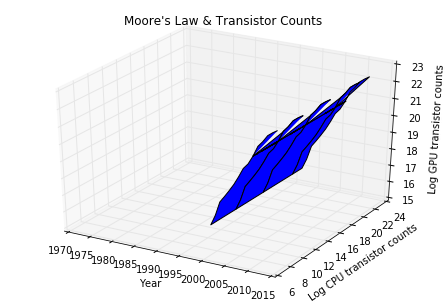

In [77]:
fig = plt.figure() #建立一個plt 對象
ax = Axes3D(fig) #利用fig建立一個Axe3D 對象
ax.plot_surface(X,Y,Z)
ax.set_xlabel("Year")
ax.set_ylabel("Log CPU transistor counts")
ax.set_zlabel("Log GPU transistor counts")
ax.set_title("Moore's Law & Transistor Counts")
plt.show()

In [78]:
#Pandas Series &DataFrame 都有使用matplotlib 的函數可以使用plot ()做圖

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [80]:
df = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/transcount.csv")
df = df.groupby('year').aggregate(np.mean)
gpu = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/gpu_transcount.csv")
gpu = gpu.groupby('year').aggregate(np.mean)
df = pd.merge(df,gpu,how='outer',left_index=True,right_index=True)
df = df.replace(np.nan,0)

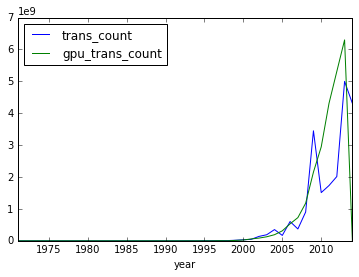

In [82]:
df.plot() #直接使用.plot()即可畫圖

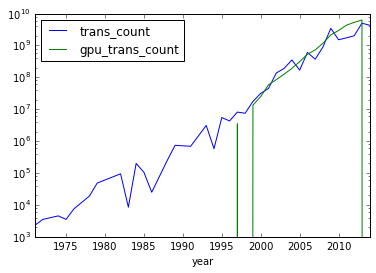

In [83]:
df.plot(logy=True) #使用logy就可以改成log

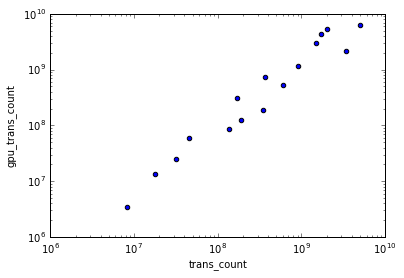

In [84]:
#使用散點圖需要較多參數設定
df[df['gpu_trans_count']>0].plot(kind='scatter',
                                x='trans_count',y='gpu_trans_count',loglog=True)

In [85]:
#時滯圖其實就是散點圖 把時間序列的圖像及相同序列在時間軸上後延的圖像放在一起展示
#ex 檢查今年與去年的相關性 可以使用pandas tools plotting 中lag_plot()製作

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.tools.plotting import lag_plot

In [88]:
df = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/transcount.csv")
df = df.groupby('year').aggregate(np.mean)
gpu = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/gpu_transcount.csv")
gpu = gpu.groupby('year').aggregate(np.mean)
df = pd.merge(df,gpu,how='outer',left_index=True,right_index=True)
df = df.replace(np.nan,0)
print df[:10]

        trans_count  gpu_trans_count
year                                
1971    2300.000000              0.0
1972    3500.000000              0.0
1974    4533.333333              0.0
1975    3510.000000              0.0
1976    7500.000000              0.0
1978   19000.000000              0.0
1979   48500.000000              0.0
1982   94500.000000              0.0
1983    8500.000000              0.0
1984  200000.000000              0.0


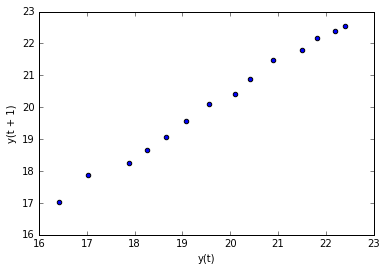

In [89]:
lag_plot(np.log(df['gpu_trans_count']))
plt.show()

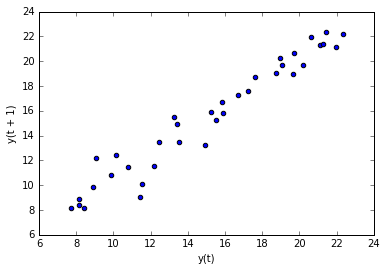

In [90]:
lag_plot(np.log(df['trans_count']))
plt.show()

In [91]:
# 自相關圖是時間數據字不同時間點的相互關係
# 利用pandas tools plotting  中的autocorrelation_plot()


In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot

In [93]:
df = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/transcount.csv")
df = df.groupby('year').aggregate(np.mean)
gpu = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/gpu_transcount.csv")
gpu = gpu.groupby('year').aggregate(np.mean)
df = pd.merge(df,gpu,how='outer',left_index=True,right_index=True)
df = df.replace(np.nan,0)

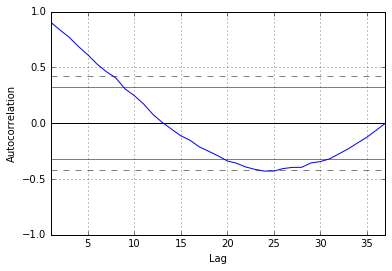

In [94]:
autocorrelation_plot(np.log(df['trans_count']))
plt.show()

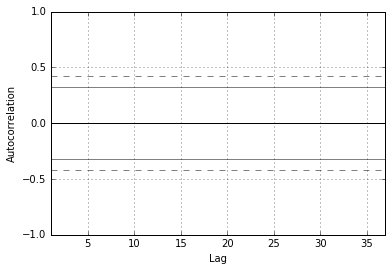

In [95]:
autocorrelation_plot(np.log(df['gpu_trans_count']))
plt.show()

In [96]:
#利用　plot.ly畫箱型圖

In [97]:
import plotly.plotly as py
from plotly.graph_objs import *
from getpass import getpass
import numpy as np
import pandas as pd

In [98]:
df = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/transcount.csv")
df = df.groupby('year').aggregate(np.mean)
gpu = pd.read_csv("3358OS_Code/3358OS_06_Code/code6/gpu_transcount.csv")
gpu = gpu.groupby('year').aggregate(np.mean)
df = pd.merge(df,gpu,how='outer',left_index=True,right_index=True)
df = df.replace(np.nan,0)

In [99]:
api_key = getpass()

········


In [100]:
py.sign_in('hankyang77122',api_key)

In [101]:
data = Data([Box(y=counts),Box(y=gpu_counts)])

In [102]:
plot_url = py.plot(data,filename='moore-law-scatter')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hankyang77122/0 or inside your plot.ly account where it is named 'moore-law-scatter'
